In [1]:
import csv
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
np.set_printoptions(precision=3, suppress=True)

In [39]:
Row_list=[]

with open('supermarket_sales_vn.csv',mode='r',encoding='utf-8',newline='') as f:
    super_data=csv.reader(f)
    header=next(super_data)
    print(header)
    for row in super_data:
        print(row)
        Row_list.append(row)
len_data=len(Row_list)
print("Tổng số dòng data: ",len_data)


['Invoice ID', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'Rating']
['750-67-8428', 'Hà Nội', 'Member', 'Nữ', 'Health and beauty', '74.69', '7', '26.1415', '548.9715', '1/5/19', '13:08', 'Ewallet', '522.83', '9.1']
['226-31-3081', 'TP HCM', 'Normal', 'Nữ', 'Electronic accessories', '15.28', '5', '3.82', '80.22', '3/8/19', '10:29', 'Cash', '76.4', '9.6']
['631-41-3108', 'Hà Nội', 'Normal', 'Nam', 'Home and lifestyle', '46.33', '7', '16.2155', '340.5255', '3/3/19', '13:23', 'Credit card', '324.31', '7.4']
['123-19-1176', 'Hà Nội', 'Member', 'Nam', 'Health and beauty', '58.22', '8', '23.288', '489.048', '1/27/19', '20:33', 'Ewallet', '465.76', '8.4']
['373-73-7910', 'Hà Nội', 'Normal', 'Nam', 'Sports and travel', '86.31', '7', '30.2085', '634.3785', '2/8/19', '10:37', 'Ewallet', '604.17', '5.3']
['699-14-3026', 'TP HCM', 'Normal', 'Nam', 'Electronic accessories', '85.39', '7', '29.8865', '627.6165', '3

In [43]:
ds_price=np.array([row[5] for row in Row_list]).astype(np.float32)
print(ds_price)
print(ds_price.shape)
print(ds_price.size)
values,countsprice=np.unique(ds_price,return_counts=True)
vals, count = np.unique(ds_price, return_counts=True)
sorted_count_index = np.lexsort([vals, count])[::-1][0:10]
print(sorted_count_index)
print(count[sorted_count_index])
print(vals[sorted_count_index])
print("Trung bình gia mỗi ngày :", np.mean(countsprice))
print("Trung vi số gia mỗi ngày :", np.median(countsprice))
print("Gía trị mode cho cdon gia :",values[np.argmax(countsprice)])
print(len(ds_price))
print(sum(ds_price))
print(min(ds_price))
print(max(ds_price))

[74.69 15.28 46.33 58.22 86.31 85.39 68.84 73.56 36.26 54.84 14.48 25.51
 46.95 43.19 71.38 93.72 68.93 72.61 54.67 40.3  86.04 87.98 33.2  34.56
 88.63 52.59 33.52 87.67 88.36 24.89 94.13 78.07 83.78 96.58 99.42 68.12
 62.62 60.88 54.92 30.12 86.72 56.11 69.12 98.7  15.37 93.96 56.69 20.01
 18.93 82.63 91.4  44.59 17.87 15.43 16.16 85.98 44.34 89.6  72.35 30.61
 24.74 55.73 55.07 15.81 75.74 15.87 33.47 97.61 78.77 18.33 89.48 62.12
 48.52 75.91 74.67 41.65 49.04 20.01 78.31 20.38 99.19 96.68 19.25 80.36
 48.91 83.06 76.52 49.38 42.47 76.99 47.38 44.86 21.98 64.36 89.75 97.16
 87.87 12.45 52.75 82.7  48.71 78.55 23.07 58.26 30.35 88.67 27.38 62.13
 33.98 81.97 16.49 98.21 72.84 58.07 80.79 27.02 21.94 51.36 10.96 53.44
 99.56 57.12 99.96 63.91 56.47 93.69 32.25 31.73 68.54 90.28 39.62 92.13
 34.84 87.45 81.3  90.22 26.31 34.42 51.91 72.5  89.8  90.5  68.6  30.41
 77.95 46.26 30.14 66.14 71.86 32.46 91.54 34.56 83.24 16.48 80.97 92.29
 72.17 50.28 97.22 93.39 43.18 63.69 45.79 76.4  39

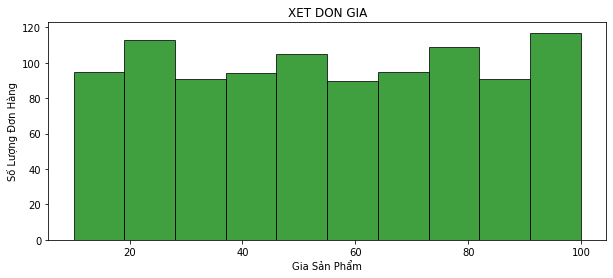

In [27]:
fig,ax = plt.subplots(figsize=(10,4), num=1)
ax.hist(ds_price,color='green', alpha=0.75, edgecolor='black', linewidth=1.0 )

ax.set_xlabel('Gia Sản Phẩm')
ax.set_ylabel('Số Lượng Đơn Hàng')

ax.set_title('XET DON GIA')
plt.gca()
plt.show()

In [28]:
top10price_pricecounts=count[sorted_count_index]
top10price_pricevalues=vals[sorted_count_index]

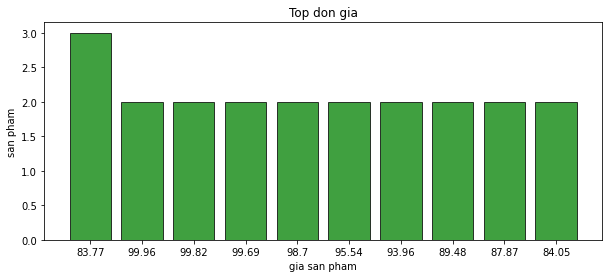

In [29]:
plt.figure(figsize=(10,4))
plt.bar(x=range(10),height=top10price_pricecounts,alpha=0.75,width=0.8,color='green',linewidth=1.0,edgecolor='black')
plt.title('Top don gia')
plt.xlabel('gia san pham')
plt.ylabel('san pham')
plt.xticks(range(10),top10price_pricevalues, rotation='horizontal')
plt.gca()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


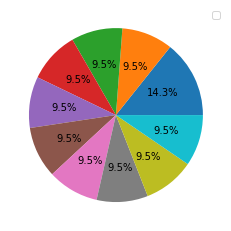

In [30]:
plt.pie(top10price_pricecounts, autopct='%1.1f%%')
plt.legend()
plt.show()

In [42]:
#TONGDON
ds_Quantity=np.array([row[6] for row in Row_list]).astype(np.uint8)
print(np.unique(ds_Quantity))
print(len(ds_Quantity))
valsqua, countqua = np.unique(ds_Quantity, return_counts=True)
sorted_countqua_index = np.argsort( countqua)[::-1][0:10]
print(sorted_count_index)
print(countqua[sorted_countqua_index])
print(valsqua[sorted_countqua_index])
print("Trung bình tong don mỗi ngày :", np.mean(countqua))
print("Trung vi tong don mỗi ngày :", np.median(countqua))
print("Gía trị mode cho tong don :",valsqua[np.argmax(countqua)])
print(np.min(countqua))
print(np.max(countqua))



[ 1  2  3  4  5  6  7  8  9 10]
1000
[763 942 938 932 915 879 863 817 795 765]
[119 112 109 102 102  98  92  91  90  85]
[10  1  4  7  5  6  9  2  3  8]
Trung bình tong don mỗi ngày : 100.0
Trung vi tong don mỗi ngày : 100.0
Gía trị mode cho tong don : 10
85
119


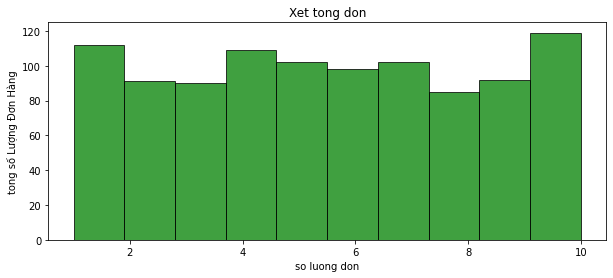

In [32]:
fig,ax = plt.subplots(figsize=(10,4), num=1)
ax.hist(ds_Quantity,color='green', alpha=0.75, edgecolor='black', linewidth=1.0 ,bins=10)

ax.set_xlabel('so luong don')
ax.set_ylabel('tong số Lượng Đơn Hàng')


ax.set_title('Xet tong don')
plt.gca()
plt.show()

In [33]:
totalprice_pricecounts=countqua[sorted_countqua_index]
totalprice_pricevalues=valsqua[sorted_countqua_index]

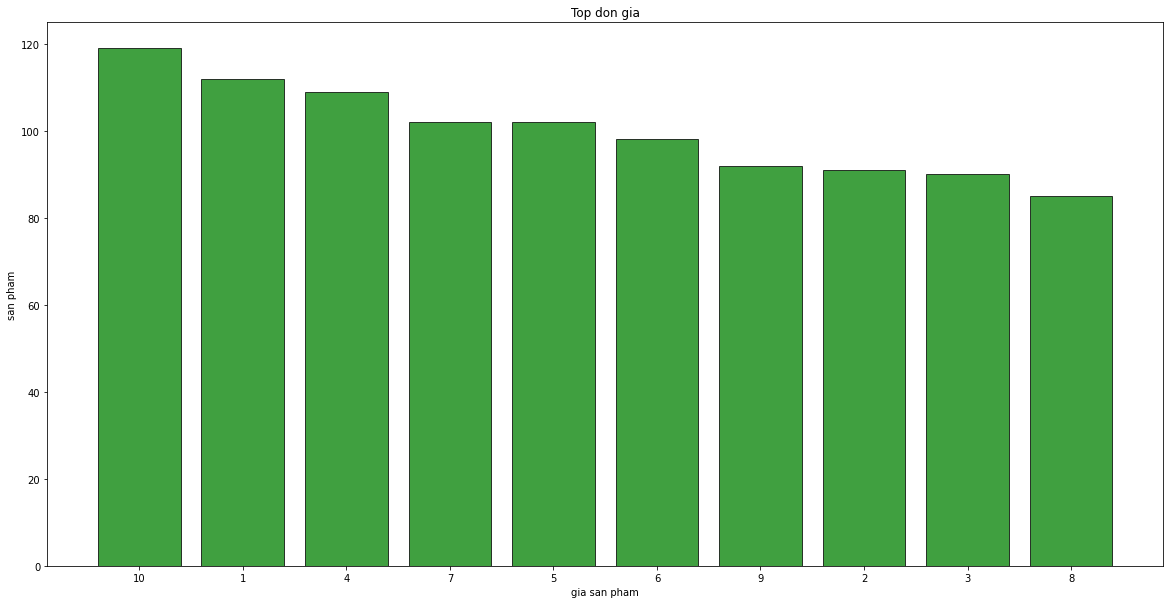

In [34]:
plt.figure(figsize=(20,10))
plt.bar(x=range(10),height=totalprice_pricecounts,alpha=0.75,width=0.8,color='green',linewidth=1.0,edgecolor='black')
plt.title('Top don gia')
plt.xlabel('gia san pham')
plt.ylabel('san pham')
plt.xticks(range(10), totalprice_pricevalues, rotation='horizontal')
plt.gca()
plt.show()

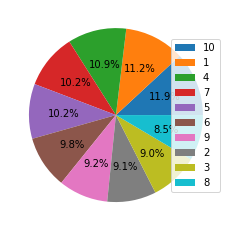

In [35]:
plt.pie(totalprice_pricecounts, autopct='%1.1f%%')
plt.legend(['10' , '1'  ,'4','7' ,  '5', '6' , '9'  ,'2' , '3' , '8'],loc="right")
plt.show()

In [78]:
#đơn hàng theo chi nhánh
ds_city=np.array([row[1] for row in Row_list ])
ds_product=np.array([float(row[8]) for row in Row_list])
print(np.unique(ds_product))
print(np.unique(ds_city))

[  10.678   12.694   13.167   13.419   14.679   16.107   16.201   16.275
   17.094   18.637   19.194   19.247   20.108   20.685   22.386   22.659
   23.499   23.751   24.108   25.263   26.25    26.555   26.723   26.733
   26.796   28.424   30.219   30.408   30.996   31.227   31.752   31.93
   32.141   32.151   32.277   32.529   33.358   33.432   33.495   33.936
   34.629   35.196   35.312   36.55    37.611   37.684   38.85    40.341
   40.53    40.961   41.076   41.391   41.454   41.737   42.367   43.869
   44.352   44.593   44.992   45.108   45.927   46.683   47.859   48.51
   48.73    49.308   49.423   49.77    49.812   51.041   51.145   53.151
   53.34    53.928   54.044   54.968   54.999   55.041   55.282   55.881
   56.123   56.406   56.469   56.952   57.078   57.172   57.697   57.876
   58.222   59.325   60.816   62.002   63.263   63.315   63.913   63.998
   65.604   65.74    66.402   66.874   68.24    68.985   69.09    69.111
   69.405   69.668   69.72    69.993   70.287   71.15

In [81]:
ds_hn=ds_product[np.array(ds_city)=='Hà Nội']

ds_hcm=ds_product[np.array(ds_city)=='TP HCM']

ds_dn =ds_product[np.array(ds_city)=='Đà Nẵng']

hnproduct=np.sum(ds_hn)
hcmproduct=np.sum(ds_hcm)
dnproduct=np.sum(ds_dn)
print( hnproduct)
print(hcmproduct)
print(dnproduct)


85584.35549999999
161644.749
75737.6445


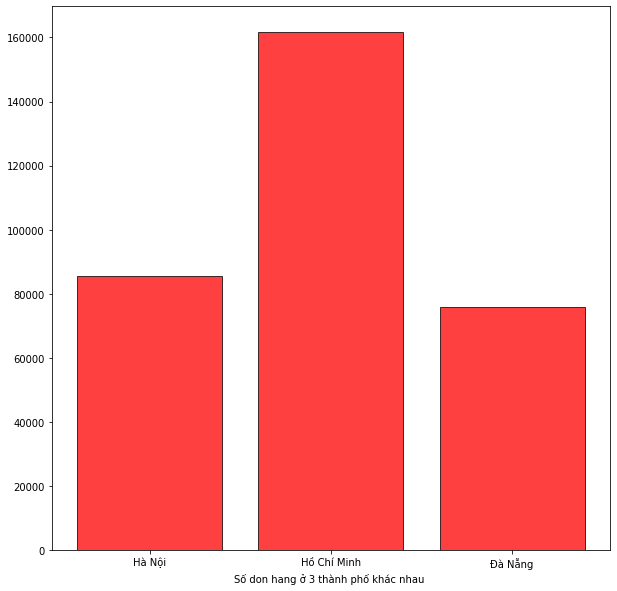

In [95]:
plt.figure(figsize=(10,10))
plt.bar(x=[0,1,2],height=[hnproduct,hcmproduct ,dnproduct ],color='red', alpha=0.75, edgecolor='black', linewidth=1.0)
plt.xticks([0,1,2],["Hà Nội", "Hồ Chí Minh", "Đà Nẵng"])
plt.xlabel("Số don hang ở 3 thành phố khác nhau ")
plt.gca()
plt.show()

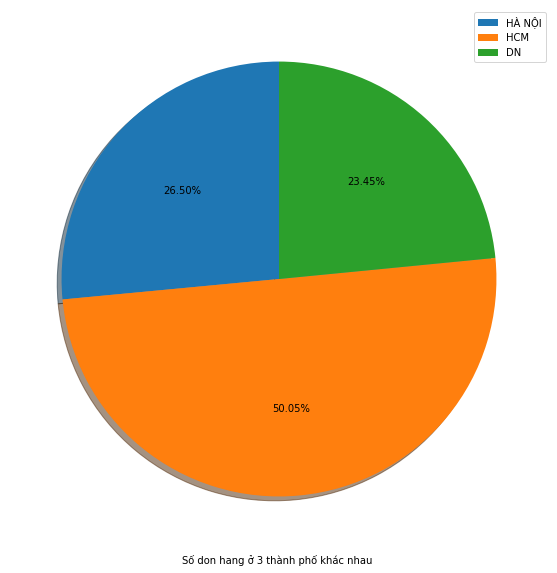

In [84]:
plt.figure(figsize=(10,10))
plt.pie([hnproduct, hcmproduct, dnproduct],autopct='%.2f%%',shadow=True, startangle=90)
plt.legend(["HÀ NỘI", "HCM", "DN"])
plt.xlabel("Số don hang ở 3 thành phố khác nhau ")
plt.show()

In [88]:
 #đơn hàng theo  giới tính
ds_gender=np.array([row[3] for row in Row_list ])
print(np.unique(ds_gender))
male_countproduct=ds_product[np.array(ds_gender)=='Nam']
female_countproduct=ds_product[np.array(ds_gender)=='Nữ']
maleproduct=np.sum(male_countproduct)
femaleproduct=np.sum(female_countproduct)



['Nam' 'Nữ']


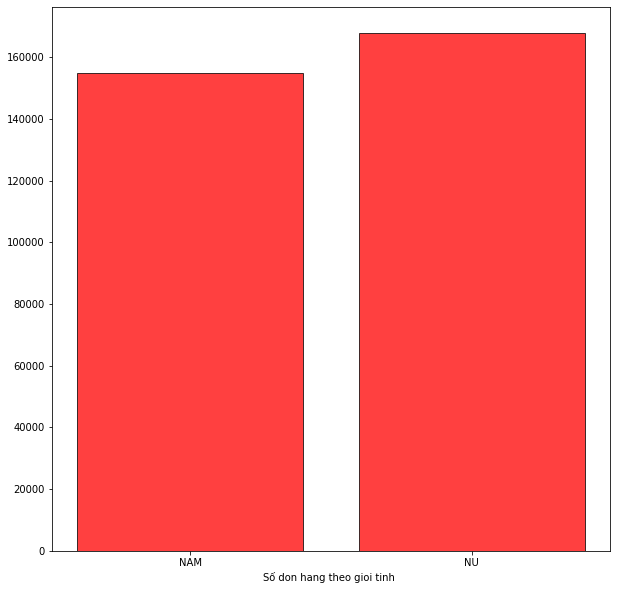

In [96]:
plt.figure(figsize=(10,10))
plt.bar(x=[0,1],height=[maleproduct ,femaleproduct ],color='red', alpha=0.75, edgecolor='black', linewidth=1.0)
plt.xticks([0,1],["NAM", "NU"])
plt.xlabel("Số don hang theo gioi tinh ")
plt.gca()
plt.show()

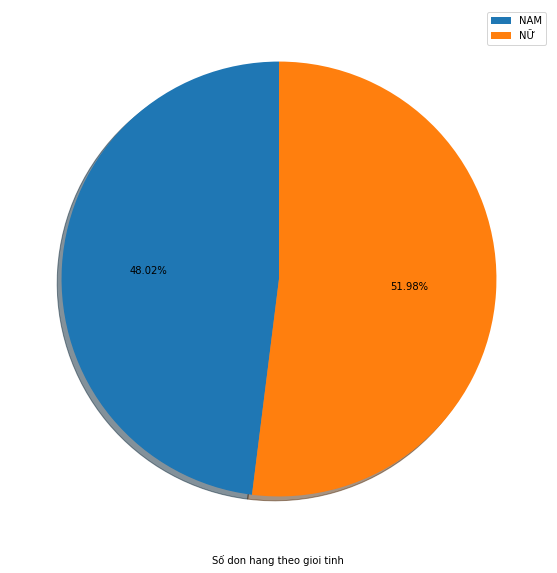

In [90]:
plt.figure(figsize=(10,10))
plt.pie([maleproduct ,femaleproduct ],autopct='%.2f%%',shadow=True, startangle=90)
plt.legend(["NAM", "NỮ"])
plt.xlabel("Số don hang theo gioi tinh ")
plt.show()

In [93]:
#So sánh tổng đơn theo phân loại sản phẩm
ds_productline=[row[4] for row in Row_list]
ds_product=np.array([float(row[8]) for row in Row_list])
print(np.unique(ds_productline))

['Electronic accessories' 'Fashion accessories' 'Food and beverages'
 'Health and beauty' 'Home and lifestyle' 'Sports and travel']


In [110]:
electro_product =ds_product[np.array(ds_productline)=='Electronic accessories']

fashion_product =ds_product[np.array(ds_productline)=='Fashion accessories']

foodandbever_product =ds_product[np.array(ds_productline)=='Food and beverages']

healthcarepro_product =ds_product[np.array(ds_productline)=='Health and beauty']
homepro_product =ds_product[np.array(ds_productline)=='Home and lifestyle']
sports_product =ds_product[np.array(ds_productline)=='Sports and travel']

totalelectro_product=np.sum(electro_product)
totalfashion_product=np.sum(fashion_product)
totalfood_product=np.sum(foodandbever_product)
totalheal_product=np.sum(healthcarepro_product)
totalhome_product=np.sum(homepro_product)
totalsports_product=np.sum(sports_product)
print(totalelectro_product)







54337.53150000001


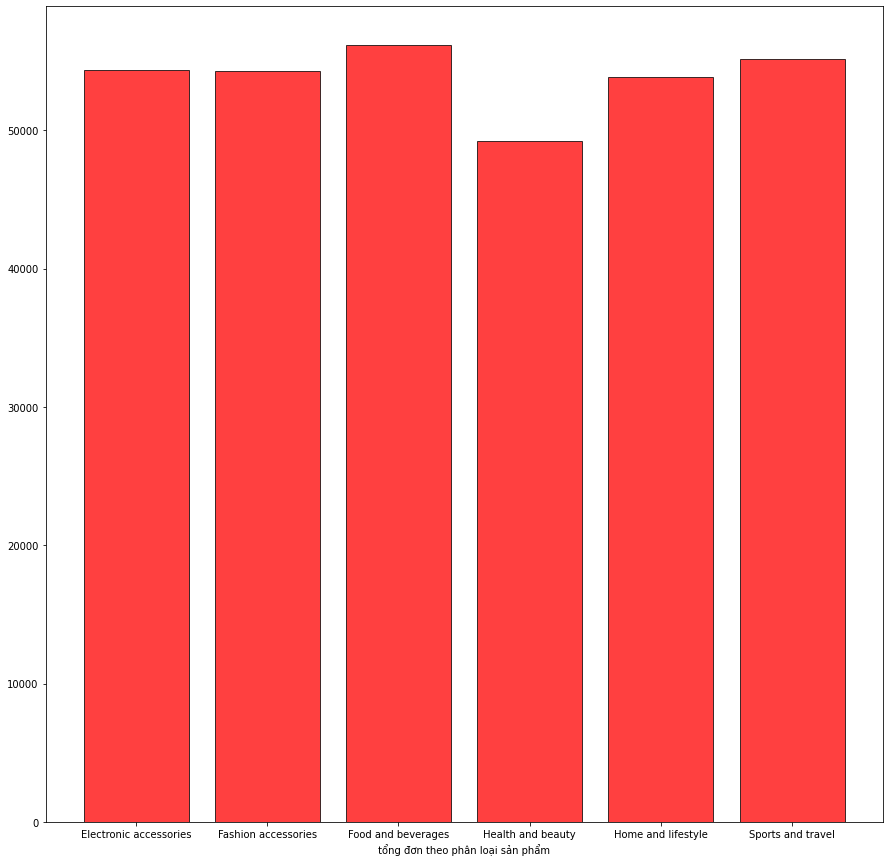

In [115]:
plt.figure(figsize=(15,15))
plt.bar(x=[0,1,2,3,4,5],height=[totalelectro_product,totalfashion_product ,totalfood_product,totalheal_product,totalhome_product,totalsports_product],color='red', alpha=0.75, edgecolor='black', linewidth=1.0)
plt.xticks([0,1,2,3,4,5],["Electronic accessories", "Fashion accessories" ,"Food and beverages","Health and beauty" ,"Home and lifestyle" ,"Sports and travel"])
plt.xlabel(" tổng đơn theo phân loại sản phẩm ")
plt.gca()
plt.show()